# 1. Лінійна регресія (1D)
Згенеруйте синтетичний набір точок виду y = ax + b + noise. .

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
np.random.seed(42)

In [3]:
n1 = 50 #количество точек

a = 0.5
b = 2
X = np.array([i for i in range(n1)])
noise = np.random.normal(loc=0.0,scale=1.0, size = X.shape)

y = a*X+b+noise

Візуалізуйте результат за
допомогою (matplotlib). 

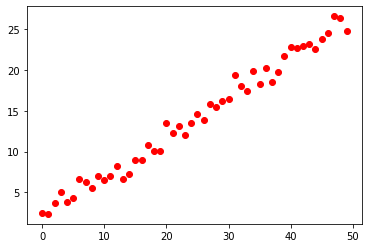

In [4]:
plt.scatter(X,y, color = 'red' )

# Вирішіть задачу лінійної регресії для такого набору точок.
# Параметри моделі знайдіть за допомогою градієнтного спуску. 

$ \mid\mid X w - y \mid\mid^2 \rightarrow min_w $ - задача лінійної регресії.

Розв'язувати її можна:

аналітично:
$ w = (X^T * X)^{-1} * X^T y $

або за допомогою стохастичного градієнтного спуску:

- обираємо випадковим чином об'єкт вибірки (0..n1-1)
- \mathop{\nabla}_{L(x)} = 2*x^T(xw-y) - градієнт кост-функції за вектором параметрів w ( в даному випадку, вектор (a, b) )
- оновлюємо вектор параметрів w:
$ w = w - \alpha * \mathop{\nabla}{L(x)} $

Повторюємо процедуру до збіжності

In [5]:
class LinearRegression:
    def __init__(self, method):
        if(method == 'sgd' or method == 'normal-eq' or method == 'gd'):
            self.method = method 
        else:
            raise ValueError("method not implemented")
        self.w = None
    def fit(self, X, y):
        if(X.shape[0]!=y.shape[0]):
            raise ValueError("dimension 0 must be equal for X and y")
        X_copy = None
        if(len(X.shape)==1):
            X_copy = np.zeros( (X.shape[0],2))
            X_copy[:,0] = 1
            X_copy[:,1] = X
        else:
            X_copy = np.zeros((X.shape[0],X.shape[1]+1))
            X_copy[:,0] = 1
            X_copy[:,1:] = X
        print("First parameter is for 1")
        #print(X_copy)
        if(self.method=='normal-eq'):
            w = np.linalg.inv(X_copy.T @ X_copy) @ X_copy.T @ y
            print(w)
            self.w = w
            return w, X_copy
        elif(self.method=='sgd'):
            w = np.random.normal(loc=0.0, scale=0.1, size = (X_copy.shape[1],))
            n = X_copy.shape[0]
            i = np.random.choice(a = [i for i in range(n)], size=1)
            x = X_copy[i]
            
            eps = 1e-6
            alpha = 0.001
            j = 0
            max_iter = 1000000
            while ( np.linalg.norm( x.T@(x@w - y[i]) ) > eps and j < max_iter):
                w = w - alpha*( x.T @(x@w - y[i]) )
                i = np.random.choice(a = [i for i in range(n)], size=1)
                x = X_copy[i]
                
                j+=1
            
            if(j>=max_iter):
                print(f"Limit of iterations reached({max_iter})")
            else:
                print(f"{j} iterations until converged")
            self.w = w
            print(w)
            return w, X_copy
        elif (self.method == 'gd'):
            w = np.random.normal(loc=0.0, scale=0.1, size = (X_copy.shape[1],))
            n = X_copy.shape[0]
            
            eps = 1e-6
            alpha = 1e-5
            j = 0
            max_iter = 10000
            while ( np.linalg.norm( X_copy.T@(X_copy@w - y) ) > eps and j < max_iter):
                w = w - alpha*( X_copy.T @(X_copy@w - y) )
                j+=1
            
            if(j>=max_iter):
                print(f"Limit of iterations reached({max_iter})")
            else:
                print(f"{j} iterations until converged")
            self.w = w
            print(w)
            return w, X_copy
    def predict(self,X):
        X_copy = None
        if(len(X.shape)==1):
            X_copy = np.zeros( (X.shape[0],2))
            X_copy[:,0] = 1
            X_copy[:,1] = X
        else:
            X_copy = np.zeros((X.shape[0],X.shape[1]+1))
            X_copy[:,0] = 1
            X_copy[:,1:] = X
        return X_copy @ self.w

In [6]:
%%time
lin_reg = LinearRegression(method='normal-eq')
w, _ = lin_reg.fit(X, y)
#w

First parameter is for 1
[2.06444309 0.48816665]
CPU times: user 3.05 ms, sys: 518 µs, total: 3.57 ms
Wall time: 2.34 ms


In [7]:
np.mean( y - lin_reg.predict(X)), np.var( y - lin_reg.predict(X))

(-4.458655666894628e-15, 0.825141795111157)

In [8]:
%%time
lin_reg = LinearRegression(method='sgd')
w, _ = lin_reg.fit(X,y)
#w

First parameter is for 1
Limit of iterations reached(1000000)
[2.0861638  0.55684557]
CPU times: user 1min 31s, sys: 326 ms, total: 1min 32s
Wall time: 1min 32s


In [9]:
np.mean( y - lin_reg.predict(X)), np.var( y - lin_reg.predict(X))

(-1.7043541087303469, 1.8074139999746206)

In [10]:
lin_reg = LinearRegression(method='gd')
w, _ = lin_reg.fit(X,y)

First parameter is for 1
Limit of iterations reached(10000)
[1.4823203  0.50581235]


In [11]:
np.mean( y - lin_reg.predict(X)), np.var( y - lin_reg.predict(X))

(0.1498031144907451, 0.8899847568604643)

In [12]:
(b, a)

(2, 0.5)

Коментарі:
- на невеликих датасетах може бути доцільним використання нормального рівняння.
- на великих датасетах зручніше користуватися методами оптимізації ( зокрема, стохастичний градієнтний спуск)
sgd найлегший за ресурсами, але може вимагати багато ітерацій для збіжності.
normal-eq може вимагати багато ресурсів (обернення великого розміру матриці)

# 2. Логістична регресія (2D)
Згенеруйте два синтетичних набори точок на площині, додайте ім мітки класів (0 і 1).

In [31]:
from sklearn.datasets import make_classification
X_data, y_data = make_classification(n_samples=100, n_features=2,n_informative=2, n_redundant=0, n_repeated=0,weights=[0.5,0.5],random_state=42)
X_data[:5], y_data[:5]

(array([[ 0.55942643,  2.38869353],
        [ 1.31217492, -0.7173148 ],
        [-1.5598485 , -1.92487377],
        [-2.2813861 , -0.1368559 ],
        [ 1.56070438, -0.42795824]]),
 array([0, 1, 0, 0, 1]))

Візуалізуйте результат за допомогою (matplotlib). 

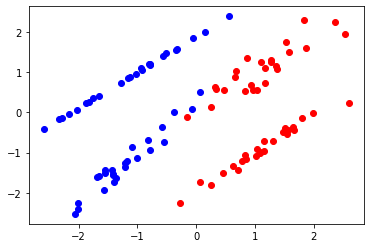

In [32]:
plt.scatter(X_data[y_data==0][:,0], X_data[y_data==0][:,1] , color = 'blue')
plt.scatter(X_data[y_data==1][:,0], X_data[y_data==1][:,1] , color = 'red')

Розділіть дані на класи за допомогою
логістичної регресії.

Нехай $ y_{i} $ - істинні мітки (0,1) , $ p(w,x_i) $ - ймовірності класу 1 для обьекту $x_i$.
Тоді логістична регресія - рішення оптимізаційної задачі:
$$ \sum_{i=1}^{n}(-y_i*log(p(w,x_i))-(1-y_i)*log(1-p(w,x_i)) \rightarrow min_w $$

Аналітичного розвязку дана задача не має. Тому, розв'язати будемо методами gd та sgd.

$$ \mathop{\nabla}{L(x)} = (\sigma(w,x) - y)*x$$

In [25]:
def sigmoid(M):
    return 1.0/(1+np.exp(-M))

#Дана реалізація логістичної регрессії підтримує параметр fit_intercept - чи навчати параметр для константи
class LogisticRegression:
    def __init__(self, method='sgd', fit_intercept=False):
        if(method=='sgd'):
            self.method=method
        else:
            raise ValueError("method not implemented")
        if(fit_intercept==True or fit_intercept==False):
            self.fit_intercept=fit_intercept
        self.w = None
    def fit(self, X, y):
        if(X.shape[0]!=y.shape[0]):
            raise ValueError("dimension 0 must be equal for X and y")
        X_copy = None
        if len(X.shape)==1 and self.fit_intercept==True:
            X_copy = np.zeros( (X.shape[0],2))
            X_copy[:,0] = 1
            X_copy[:,1] = X
        elif len(X.shape)==1 and self.fit_intercept ==False:
            X_copy = np.zeros( (X.shape[0],1))
            X_copy[:,0] = X
        elif len(X.shape)==2 and self.fit_intercept == False:
            X_copy = X
        elif len(X.shape)==2 and self.fit_intercept==True:
            X_copy = np.zeros((X.shape[0],X.shape[1]+1))
            X_copy[:,0] = 1
            X_copy[:,1:] = X
        if(self.method=='sgd'):
            w = np.random.normal(loc=0.0, scale=0.1, size = (X_copy.shape[1],))
            n = X_copy.shape[0]
            i = np.random.choice(a = [j for j in range(n)], size=1)
            x = X_copy[i]
            
            eps = 1e-6
            alpha = 0.001
            j = 0
            max_iter = 1000000
            grad_vect = (sigmoid(-float(x@w))-y[i])*x
            while ( np.linalg.norm( grad_vect ) > eps and j < max_iter):
                w = w - alpha*(grad_vect*x)
                i = np.random.choice(a = [i for i in range(n)], size=1)
                x = X_copy[i]
                w = w[0]
                grad_vect = (sigmoid(-float(x@w))-y[i])*x
                grad_vect = grad_vect[0]
                j+=1
            
            if(j>=max_iter):
                print(f"Limit of iterations reached({max_iter})")
            else:
                print(f"{j} iterations until converged")
            self.w = w
            print(w)
            return w, X_copy

    def predict(self,X):
        X_copy = None
        if len(X.shape)==1 and self.fit_intercept==True:
            X_copy = np.zeros( (X.shape[0],2))
            X_copy[:,0] = 1
            X_copy[:,1] = X
        elif len(X.shape)==1 and self.fit_intercept ==False:
            X_copy = np.zeros( (X.shape[0],1))
            X_copy[:,0] = X
        elif len(X.shape)==2 and self.fit_intercept == False:
            X_copy = X
        elif len(X.shape)==2 and self.fit_intercept==True:
            X_copy = np.zeros((X.shape[0],X.shape[1]+1))
            X_copy[:,0] = 1
            X_copy[:,1:] = X
        return np.array([sigmoid(-x@self.w) for x in X_copy])

In [33]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_data,y_data, stratify=y_data, shuffle=True)

In [34]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

log_reg = LogisticRegression(method='sgd',fit_intercept=False)
log_reg.fit(X_train, y_train)

y_pred = (log_reg.predict(X_test)>0.5).astype('int')
print(f"Accuracy: {accuracy_score(y_test,y_pred)}")
print(f"Precision: {precision_score(y_test,y_pred)}")
print(f"Recall: {recall_score(y_test, y_pred)}")

Limit of iterations reached(1000000)
[-4.0554234   0.16996918]
Accuracy: 0.92
Precision: 0.9230769230769231
Recall: 0.9230769230769231


In [35]:
log_reg = LogisticRegression(method='sgd',fit_intercept=True)
log_reg.fit(X_train, y_train)

y_pred = (log_reg.predict(X_test)>0.5).astype('int')
print(f"Accuracy: {accuracy_score(y_test,y_pred)}")
print(f"Precision: {precision_score(y_test,y_pred)}")
print(f"Recall: {recall_score(y_test, y_pred)}")

27525 iterations until converged
[-2.77726959 -3.03516819 -2.28033857]
Accuracy: 0.76
Precision: 0.6842105263157895
Recall: 1.0


Перевірте якість алгоритма за допомогою метрики accuracy (на
тестових даних).